ALUMNO: Enrique Villalobos Torregrosa

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
from scipy.stats import skew, kurtosis

## PARTE 1

In [2]:
file_path = os.path.join(os.getcwd(), 'diamonds.csv')
df = pd.read_csv(file_path)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.2,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.replace('?', np.nan, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53939 non-null  float64
 1   cut      53936 non-null  object 
 2   color    53937 non-null  object 
 3   clarity  53938 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53938 non-null  float64
 6   price    53937 non-null  object 
 7   x        53937 non-null  object 
 8   y        53939 non-null  float64
 9   z        53939 non-null  float64
dtypes: float64(5), object(5)
memory usage: 4.1+ MB


In [4]:
df['cut'] = df['cut'].astype('category')
df['color'] = df['color'].astype('category')
df['clarity'] = df['clarity'].astype('category')
df['price'] = df['price'].astype('float64')
df['x'] = df['x'].astype('float64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53939 non-null  float64 
 1   cut      53936 non-null  category
 2   color    53937 non-null  category
 3   clarity  53938 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53938 non-null  float64 
 6   price    53937 non-null  float64 
 7   x        53937 non-null  float64 
 8   y        53939 non-null  float64 
 9   z        53939 non-null  float64 
dtypes: category(3), float64(7)
memory usage: 3.0 MB


In [5]:
#en vars continuas
for col in df.select_dtypes(include=[np.number]).columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

In [6]:
# vars categoricas
for col in df.select_dtypes(include=['category']).columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0]) 


In [7]:
#evaluamos nan
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [8]:
 #One-Hot
one_hot = pd.get_dummies(df, columns=['color'], drop_first=True).copy()
df = pd.concat([df['color'], one_hot], axis=1)
df.head()

,color,carat,cut,clarity,depth,table,price,x,y,z,color_E,color_F,color_G,color_H,color_I,color_J
0,E,0.23,Ideal,SI2,61.5,55.0,326.0,3.95,3.98,2.43,True,False,False,False,False,False
1,E,0.21,Premium,SI1,59.8,61.0,326.0,3.89,3.84,2.31,True,False,False,False,False,False
2,E,0.23,Good,VS1,56.9,65.0,327.0,4.05,4.07,2.31,True,False,False,False,False,False
3,I,0.29,Premium,VS2,62.4,58.0,334.0,4.20,4.23,2.63,False,False,False,False,True,False
4,J,0.31,Good,SI2,63.3,58.0,335.0,4.34,4.35,2.75,False,False,False,False,False,True


In [9]:

mapeo = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
df['cut_int'] = df['cut'].map(mapeo)

df.head()

,color,carat,cut,clarity,depth,table,price,x,y,z,color_E,color_F,color_G,color_H,color_I,color_J,cut_int
0,E,0.23,Ideal,SI2,61.5,55.0,326.0,3.95,3.98,2.43,True,False,False,False,False,False,4
1,E,0.21,Premium,SI1,59.8,61.0,326.0,3.89,3.84,2.31,True,False,False,False,False,False,3
2,E,0.23,Good,VS1,56.9,65.0,327.0,4.05,4.07,2.31,True,False,False,False,False,False,1
3,I,0.29,Premium,VS2,62.4,58.0,334.0,4.20,4.23,2.63,False,False,False,False,True,False,3
4,J,0.31,Good,SI2,63.3,58.0,335.0,4.34,4.35,2.75,False,False,False,False,False,True,1


## PARTE 2

In [10]:
df['price_iva'] = df['price'] * 1.21

In [11]:
def calcular_descuento(row):
    if row['price'] < 1000 and row['cut'] == 'Ideal':
        return row['price'] * 0.90  # 10 % 
    elif 1000 <= row['price'] <= 5000 and row['cut'] == 'Premium':
        return row['price'] * 0.85  # 15 % 
    else:
        return row['price']  # Sin descuento

df['price_discount'] = df.apply(calcular_descuento, axis=1)
df.head()

,color,carat,cut,clarity,depth,table,price,x,y,z,color_E,color_F,color_G,color_H,color_I,color_J,cut_int,price_iva,price_discount
0,E,0.23,Ideal,SI2,61.5,55.0,326.0,3.95,3.98,2.43,True,False,False,False,False,False,4,394.46,293.4
1,E,0.21,Premium,SI1,59.8,61.0,326.0,3.89,3.84,2.31,True,False,False,False,False,False,3,394.46,326.0
2,E,0.23,Good,VS1,56.9,65.0,327.0,4.05,4.07,2.31,True,False,False,False,False,False,1,395.67,327.0
3,I,0.29,Premium,VS2,62.4,58.0,334.0,4.20,4.23,2.63,False,False,False,False,True,False,3,404.14,334.0
4,J,0.31,Good,SI2,63.3,58.0,335.0,4.34,4.35,2.75,False,False,False,False,False,True,1,405.35,335.0


In [12]:
df['volumen'] = df['x'] * df['y'] * df['z']

In [13]:
df_ord = df.sort_values(by=['cut', 'price']).reset_index(drop=True)
df_ord.head()

,color,carat,cut,clarity,depth,table,price,x,y,z,color_E,color_F,color_G,color_H,color_I,color_J,cut_int,price_iva,price_discount,volumen
0,E,0.22,Fair,VS2,65.1,61.0,337.0,3.87,3.78,2.49,True,False,False,False,False,False,0,407.77,337.0,36.425214
1,E,0.25,Fair,VS1,55.2,64.0,361.0,4.21,4.23,2.33,True,False,False,False,False,False,0,436.81,361.0,41.493339
2,G,0.23,Fair,VVS2,61.4,66.0,369.0,3.87,3.91,2.39,False,False,True,False,False,False,0,446.49,369.0,36.164763
3,E,0.27,Fair,VS1,66.4,58.0,371.0,3.99,4.02,2.66,True,False,False,False,False,False,0,448.91,371.0,42.665868
4,J,0.30,Fair,VS2,64.8,58.0,416.0,4.24,4.16,2.72,False,False,False,False,False,True,0,503.36,416.0,47.976448


In [14]:
agr = df.groupby(['cut', 'color', 'clarity'], observed=True).agg({
    'price': ['mean', 'max', 'min'],
    'carat': ['mean', 'max', 'min']
}).reset_index()

agr.head()

cut color clarity        price                      carat            
                              mean      max     min      mean   max   min
0  Fair     D      I1  7383.000000  15964.0  2491.0  1.877500  3.40  0.91
1  Fair     D      IF  1619.666667   2211.0  1208.0  0.380000  0.47  0.30
2  Fair     D     SI1  4273.344828  16386.0   644.0  0.913793  2.02  0.40
3  Fair     D     SI2  4355.142857  16086.0   536.0  1.016964  2.07  0.30
4  Fair     D     VS1  2921.200000   7083.0   563.0  0.630000  1.00  0.25

## PARTE 3.

In [15]:

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Límite inferior: {lower_limit}, Límite superior: {upper_limit}")

df_not_outliers = df[(df['price'] > lower_limit) & (df['price'] < upper_limit)].copy()


Q1: 950.0, Q3: 5324.0, IQR: 4374.0
Límite inferior: -5611.0, Límite superior: 11885.0


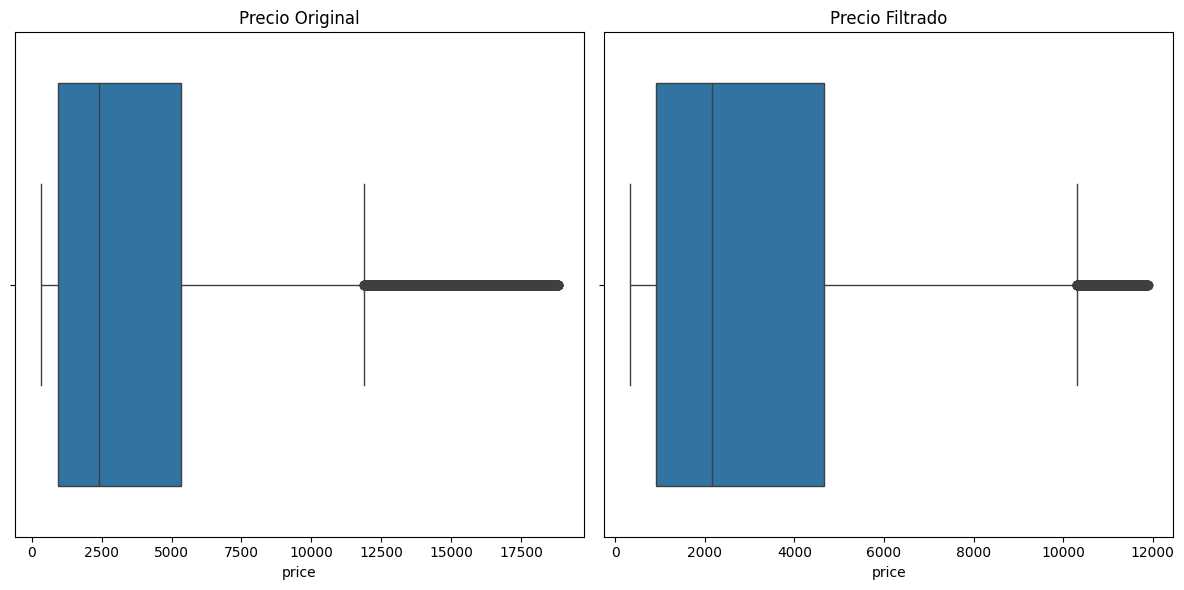

In [16]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['price'])
plt.title("Precio Original")

plt.subplot(1, 2, 2)
sns.boxplot(x=df_not_outliers['price'])
plt.title("Precio Filtrado")
plt.tight_layout()
plt.show()


In [17]:

asimetría = skew(df_not_outliers['price'])
curtosis = kurtosis(df_not_outliers['price'])

print(f"Asimetría: {asimetría}")
print(f"Curtosis: {curtosis}")



Asimetría: 1.1894347863135757
Curtosis: 0.6269531908283885


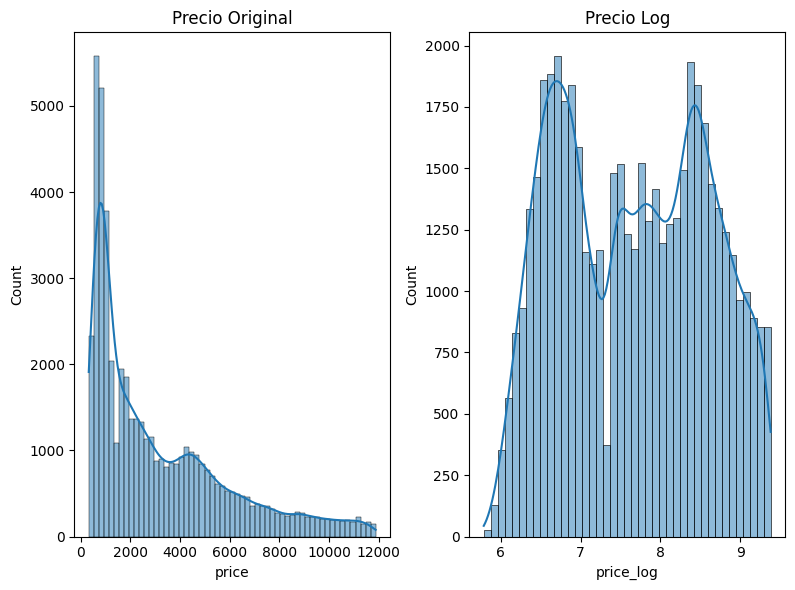

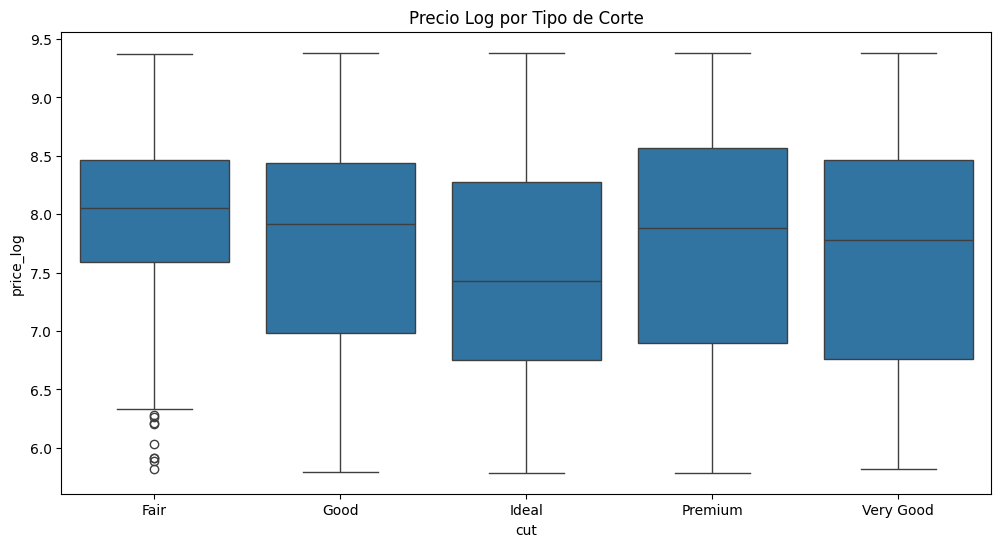

In [18]:
df_not_outliers['price_log'] = np.log(df_not_outliers['price'])


# Visualizar histogramas de las transformaciones
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.histplot(df_not_outliers['price'], kde=True)
plt.title("Precio Original")

plt.subplot(1, 3, 2)
sns.histplot(df_not_outliers['price_log'], kde=True)
plt.title("Precio Log")

plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(data=df_not_outliers, x='cut', y='price_log')
plt.title("Precio Log por Tipo de Corte")
plt.show()


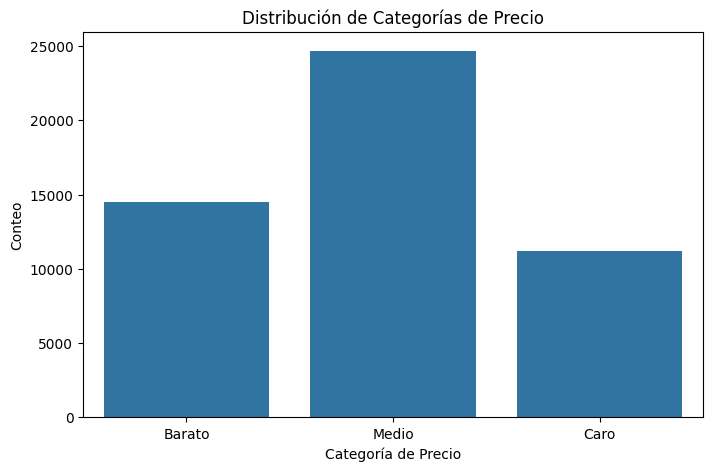

In [19]:
seg = [df_not_outliers['price'].min(), 1000, 5000, df_not_outliers['price'].max()] #segmentos
labels = ['Barato', 'Medio', 'Caro']


df_not_outliers['price_category'] = pd.cut(df_not_outliers['price'], bins=seg, labels=labels, include_lowest=True)

plt.figure(figsize=(8, 5))
sns.countplot(x='price_category', data=df_not_outliers, order=labels)
plt.title("Distribución de Categorías de Precio")
plt.xlabel("Categoría de Precio")
plt.ylabel("Conteo")
plt.show()

 ## PARTE 4:

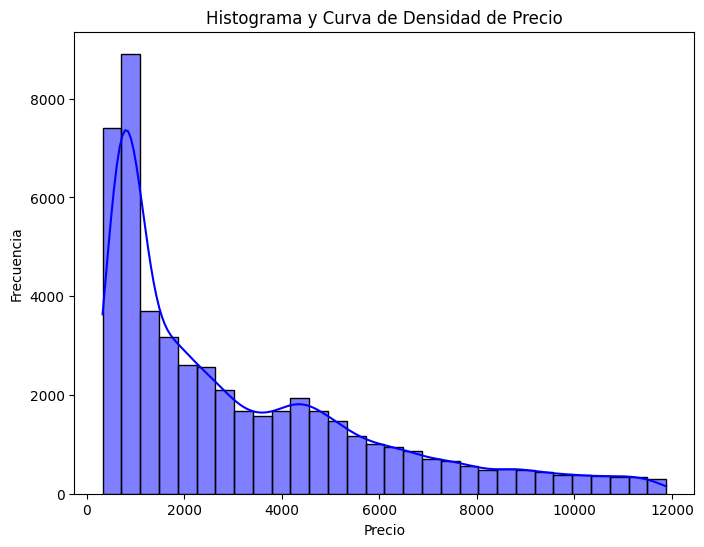

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df_not_outliers, x='price', kde=True, bins=30, color='blue')
plt.title("Histograma y Curva de Densidad de Precio")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()


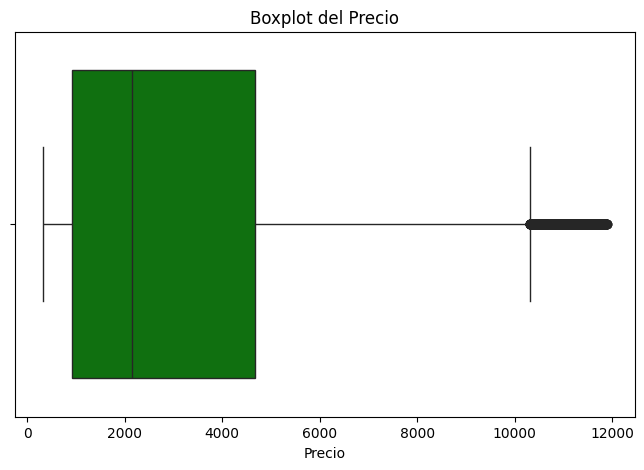

In [21]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_not_outliers, x='price', color='green')
plt.title("Boxplot del Precio")
plt.xlabel("Precio")
plt.show()


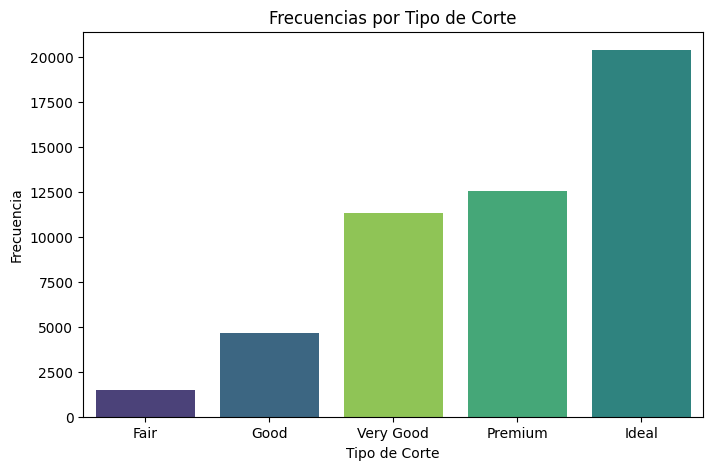

In [22]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_not_outliers, x='cut', hue='cut', palette='viridis', order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
plt.title("Frecuencias por Tipo de Corte")
plt.xlabel("Tipo de Corte")
plt.ylabel("Frecuencia")
plt.show()


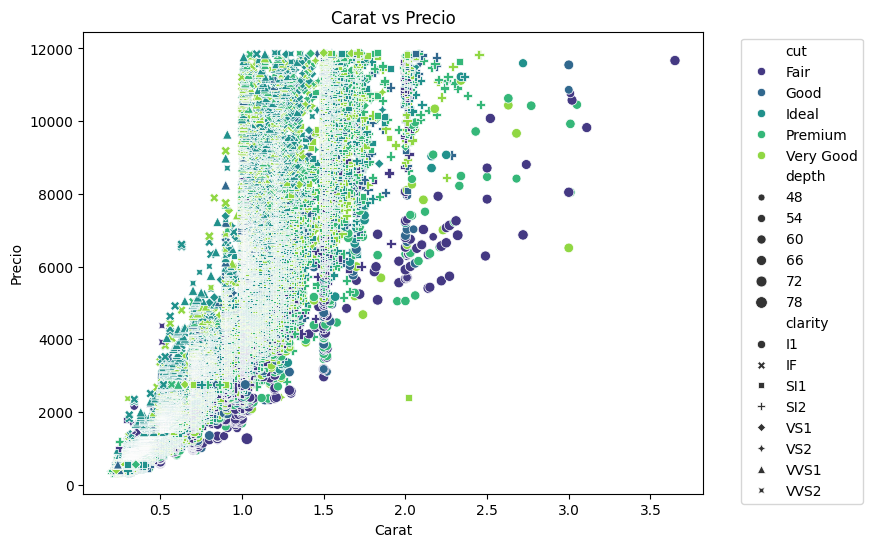

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_not_outliers, x='carat', y='price', hue='cut', size='depth', style='clarity', palette='viridis')
plt.title("Carat vs Precio")
plt.xlabel("Carat")
plt.ylabel("Precio")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [24]:
df_not_outliers.head()

,color,carat,cut,clarity,depth,table,price,x,y,z,...,color_G,color_H,color_I,color_J,cut_int,price_iva,price_discount,volumen,price_log,price_category
0,E,0.23,Ideal,SI2,61.5,55.0,326.0,3.95,3.98,2.43,...,False,False,False,False,4,394.46,293.4,38.202030,5.786897,Barato
1,E,0.21,Premium,SI1,59.8,61.0,326.0,3.89,3.84,2.31,...,False,False,False,False,3,394.46,326.0,34.505856,5.786897,Barato
2,E,0.23,Good,VS1,56.9,65.0,327.0,4.05,4.07,2.31,...,False,False,False,False,1,395.67,327.0,38.076885,5.789960,Barato
3,I,0.29,Premium,VS2,62.4,58.0,334.0,4.20,4.23,2.63,...,False,False,True,False,3,404.14,334.0,46.724580,5.811141,Barato
4,J,0.31,Good,SI2,63.3,58.0,335.0,4.34,4.35,2.75,...,False,False,False,True,1,405.35,335.0,51.917250,5.814131,Barato


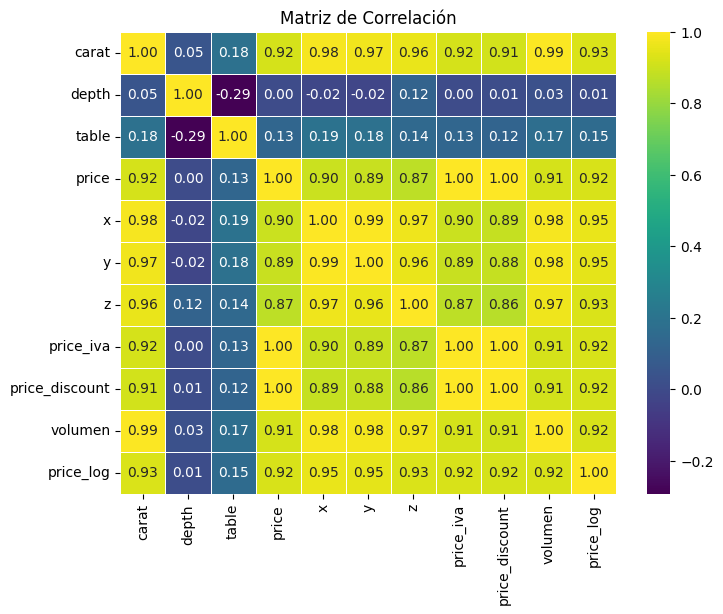

In [25]:
df_numeric = df_not_outliers.select_dtypes(include=np.number)
correlation = df_numeric.corr()

# Mostrarla con un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()


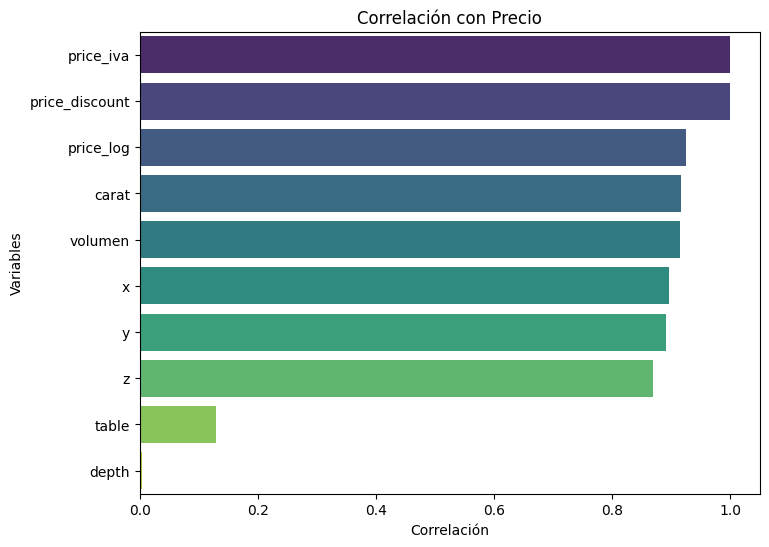

In [26]:

correlation_price = correlation['price'].drop('price').sort_values(ascending=False)

# Gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=correlation_price.values, y=correlation_price.index, hue=correlation_price.index,  palette='viridis')
plt.title("Correlación con Precio")
plt.xlabel("Correlación")
plt.ylabel("Variables")
plt.show()


In [27]:

pivot_table = df_not_outliers.pivot_table(
    index=['cut', 'clarity'],  
    columns=['color'],          
    values='price',            
    aggfunc='mean',           
    fill_value=0,
    observed=False         
)


pivot_table

color                        D            E            F            G  \
cut       clarity                                                       
Fair      I1       4522.666667  2095.222222  2543.514286  3187.471698   
          IF       1619.666667     0.000000  2344.000000  1488.000000   
          SI1      3855.857143  3581.968254  3385.500000  3230.850746   
          SI2      3757.716981  3644.662162  3637.390244  3932.909091   
          VS1      2921.200000  2363.615385  3668.937500  3282.840909   
          VS2      3698.434783  2803.000000  3199.461538  4346.853659   
          VVS1     4473.000000  4115.333333  2687.750000  2216.333333   
          VVS2     3607.000000  3119.307692  2646.444444  2445.687500   
Good      I1       3490.750000  4398.130435  2569.526316  3195.789474   
          IF       2569.500000  1519.222222  3132.866667  2395.105263   
          SI1      2818.038627  2803.376093  2909.537594  3443.472081   
          SI2      3213.337963  3135.973958  3654.398936  3887.653333   
          VS1      3233.857143  3127.105882  2442.609375  3531.546099   
          VS2      3120.140000  3290.457516  3395.734463  3820.596774   
          VVS1     2586.230769  1905.953488  2189.514286  2387.325000   
          VVS2     2345.640000  2673.857143  2958.448980  3039.109589   
Ideal     I1       2724.500000  3559.388889  3903.452381  4044.437500   
          IF       3441.523810  1521.202899  1685.802326  1838.002096   
          SI1      2250.095700  2599.032129  2920.859180  3024.239812   
          SI2      2849.928161  3533.839207  3402.541568  3397.729545   
          VS1      2432.106628  2007.554608  3054.028571  3460.444321   
          VS2      1897.871965  1916.888789  2605.821687  3376.764706   
          VVS1     2174.833333  1632.319749  1902.830918  2478.595819   
          VVS2     2536.164706  2218.774848  2971.123260  3190.373297   
Premium   I1       3818.750000  3199.266667  3554.558824  3848.155556   
          IF       1956.000000  3198.833333  2082.555556  3311.114943   
          SI1      2690.155598  2820.106164  3522.506920  3701.607076   
          SI2      3659.421717  3570.704782  3863.561983  3943.754762   
          VS1      3566.832000  2705.066914  3939.259259  3247.217391   
          VS2      2454.868502  2421.122483  3009.039711  3494.432974   
          VVS1     2418.361111  2249.465347  3583.922078  2294.834356   
          VVS2     3407.122222  2642.389831  3954.263889  3522.439689   
Very Good I1       2622.800000  3443.545455  4252.923077  3194.812500   
          IF       4465.500000  3703.100000  3629.819672  3372.435897   
          SI1      2938.250000  2912.297209  3191.390018  2999.574236   
          SI2      3782.898990  3516.136364  3397.376947  3756.426667   
          VS1      2648.766082  2754.308772  3208.028881  2939.092500   
          VS2      2665.503378  2721.440252  3269.479358  3574.207289   
          VVS1     1792.085106  1849.244048  2397.672619  2388.751351   
          VVS2     2264.489051  1879.085324  2939.209205  3150.055556   

color                        H            I            J  
cut       clarity                                         
Fair      I1       3955.784314  3501.000000  4606.523810  
          IF          0.000000     0.000000     0.000000  
          SI1      4036.089552  3864.392857  4248.111111  
          SI2      4905.387500  5463.375000  3846.125000  
          VS1      4007.666667  3179.681818  3996.000000  
          VS2      3908.567568  3473.129032  2707.450000  
          VVS1     4115.000000  4194.000000  1691.000000  
          VVS2     3481.727273  2994.625000  2998.000000  
Good      I1       3849.714286  4175.444444  3794.500000  
          IF       3515.666667  1749.333333  2738.000000  
          SI1      3437.622727  3642.362416  3753.850000  
          SI2      3887.659259  4862.968750  4775.780000  
          VS1      3509.146667  3721.715789  3168.860000  
          VS2      3674.426357  4023.576087  413

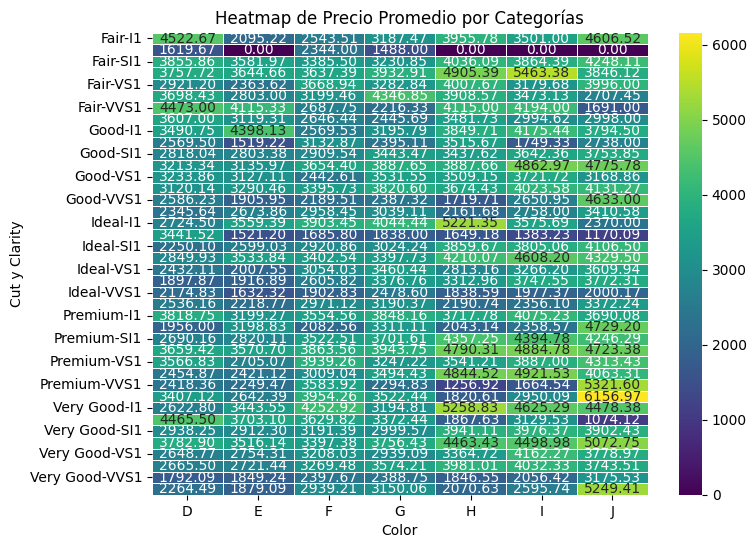

In [28]:

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title("Heatmap de Precio Promedio por Categorías")
plt.xlabel("Color")
plt.ylabel("Cut y Clarity")
plt.show()


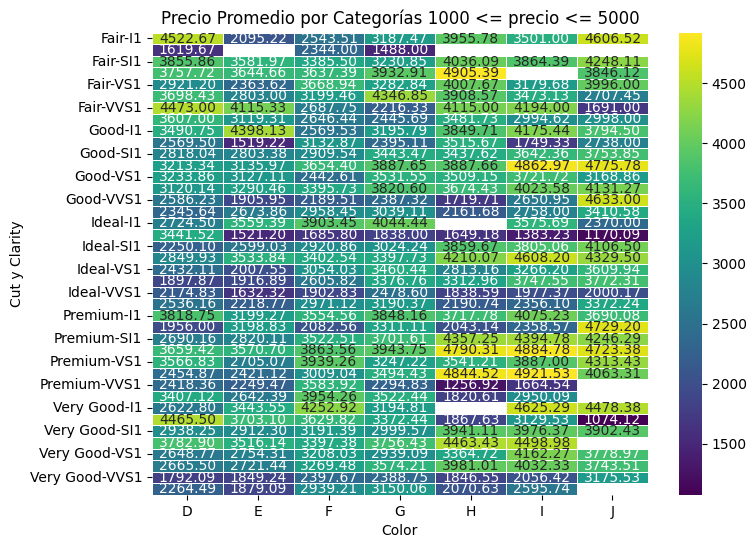

In [29]:
#filtrada 1000 <= precio <= 5000

tb_1000_5000 = pivot_table[(pivot_table > 1000) & (pivot_table < 5000)].copy()


plt.figure(figsize=(8, 6))  
sns.heatmap(tb_1000_5000, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title("Precio Promedio por Categorías 1000 <= precio <= 5000")
plt.xlabel("Color")
plt.ylabel("Cut y Clarity")
plt.show()
